#Importing required libraries



In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from numpy import sqrt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

#Importing test and train datasets

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

#Observing the data

In [ ]:
train.head(5)

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,ExterQual_TA,Foundation_PConc,KitchenQual_TA
0,6,1969,1969,663,663,1352,1,7,1,299,158000,1,0,1
1,6,1920,1950,1012,1012,1012,1,6,1,308,118400,1,0,1
2,5,1910,2006,1022,1022,1022,1,4,1,280,85000,1,0,1
3,5,1973,1973,1656,1656,1656,2,8,2,506,135000,1,0,1
4,6,1978,1978,918,918,1683,2,7,2,440,172500,1,0,1


In [ ]:
train.shape, test.shape

((765, 14), (329, 14))

In [ ]:
print(f"Total number of rows: {train.shape[0] + test.shape[0]}")

Total number of rows: 1094


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   OverallQual       765 non-null    int64
 1   YearBuilt         765 non-null    int64
 2   YearRemodAdd      765 non-null    int64
 3   TotalBsmtSF       765 non-null    int64
 4   1stFlrSF          765 non-null    int64
 5   GrLivArea         765 non-null    int64
 6   FullBath          765 non-null    int64
 7   TotRmsAbvGrd      765 non-null    int64
 8   GarageCars        765 non-null    int64
 9   GarageArea        765 non-null    int64
 10  SalePrice         765 non-null    int64
 11  ExterQual_TA      765 non-null    int64
 12  Foundation_PConc  765 non-null    int64
 13  KitchenQual_TA    765 non-null    int64
dtypes: int64(14)
memory usage: 83.8 KB


#Setting the datasets

In [ ]:
# Setting the features and the target of train dataset

# We remove the labels from attributes and others are features
X_train = train.drop('SalePrice', axis=1)

# We set the target as SalePrice
y_train = train.loc[:,'SalePrice']

In [ ]:
# Setting the features and the target of test dataset as we did above
X_test = test.drop('SalePrice', axis=1)
y_test = test.loc[:,'SalePrice']

#Training the models and getting predictions

In [ ]:
models={
    'LinearRegression' : LinearRegression(),
    'ElasticNet' : ElasticNet()
}

In [ ]:
for model_name, model_instance in models.items():
  print(f"{model_name}".center(30, '*'))

  # Training the models
  model_instance.fit(X_train, y_train)

  # Get predictions
  preds = model_instance.predict(X_test)

  # Calculating evaluation metrics
  mse = round(mean_squared_error(y_test, preds), 2)
  rmse = round(sqrt(mse), 2)
  mae = round(mean_absolute_error(y_test, preds), 2)
  r2 = round(r2_score(y_test, preds), 3)

  # Printing the results
  print("MAE Score: ", mae)
  print("MSE Score: ", mse)
  print("RMSE Score: ", rmse)
  print("R-Squared Score: ", r2)
  print("\n")

*******LinearRegression*******
MAE Score:  24900.49
MSE Score:  1101336094.44
RMSE Score:  33186.38
R-Squared Score:  0.798


**********ElasticNet**********
MAE Score:  23867.36
MSE Score:  1065441233.79
RMSE Score:  32641.1
R-Squared Score:  0.805




#Checking feature correlations with 'SalePrice'

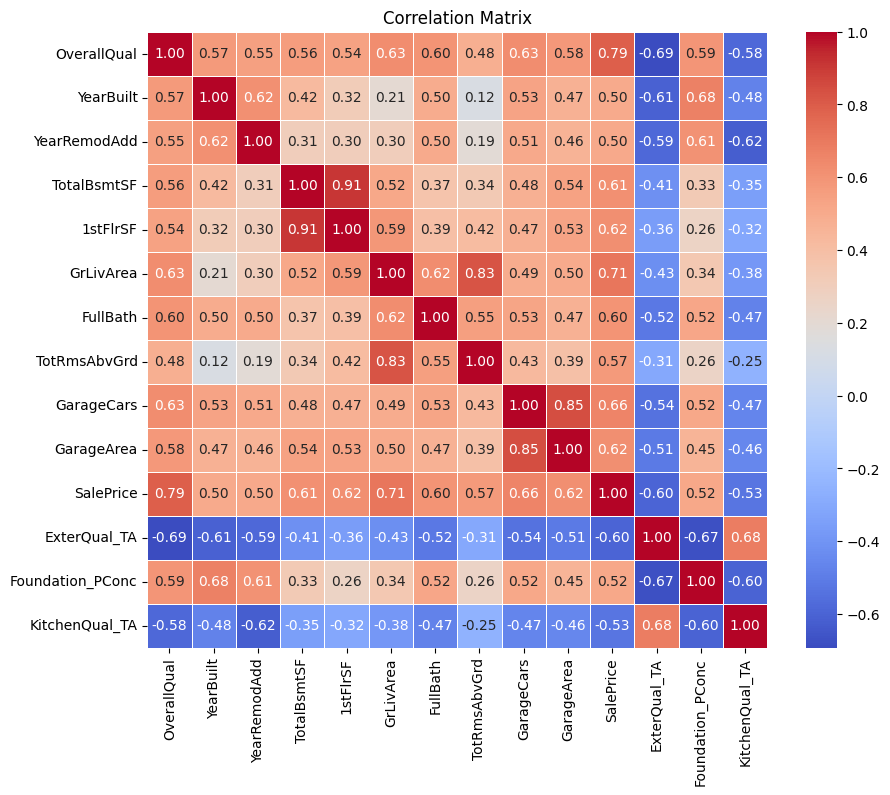

In [ ]:
# Creating correlation matrix
correlation_matrix = train.corr()

# Drawing heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()